In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab

# Set the style for plots
sns.set(style='whitegrid')
%matplotlib inline

# Load the dataset (adjust the file path if necessary)
df = pd.read_csv('/Users/alguov/Desktop/Iron Hack/Labs/EDA Labs/amz_uk_price_prediction_dataset.csv')

# Display the first few rows to ensure the data is loaded correctly
df.head()



,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Create a crosstab between 'category' and 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
print("Crosstab between category and isBestSeller:\n", crosstab)

# Calculate the proportion of best-sellers for each category
proportion_best = crosstab.div(crosstab.sum(axis=1), axis=0)

# Assuming 'isBestSeller' contains Boolean values, extract the proportion for True.
if True in proportion_best.columns:
    proportion_best = proportion_best[True]
elif 'True' in proportion_best.columns:
    proportion_best = proportion_best['True']
else:
    # If the column is numeric (1 for best-seller, 0 for not), adjust accordingly.
    proportion_best = proportion_best[1]

# Sort the categories by the proportion of best-sellers in descending order
proportion_best = proportion_best.sort_values(ascending=False)
print("\nProportion of best-sellers by category (descending order):\n", proportion_best)


Crosstab between category and isBestSeller:
 isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]

Proportion of best-sellers by category (descending order):
 category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Di

In [4]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print("\nChi-square test results:")
print("Chi-square =", chi2)
print("p-value =", p)
print("Degrees of Freedom =", dof)



Chi-square test results:
Chi-square = 36540.20270061387
p-value = 0.0
Degrees of Freedom = 295


In [5]:
# Calculate Cramér's V
n = crosstab.to_numpy().sum()
min_dim = min(crosstab.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("\nCramér's V =", cramers_v)



Cramér's V = 0.1222829439760564


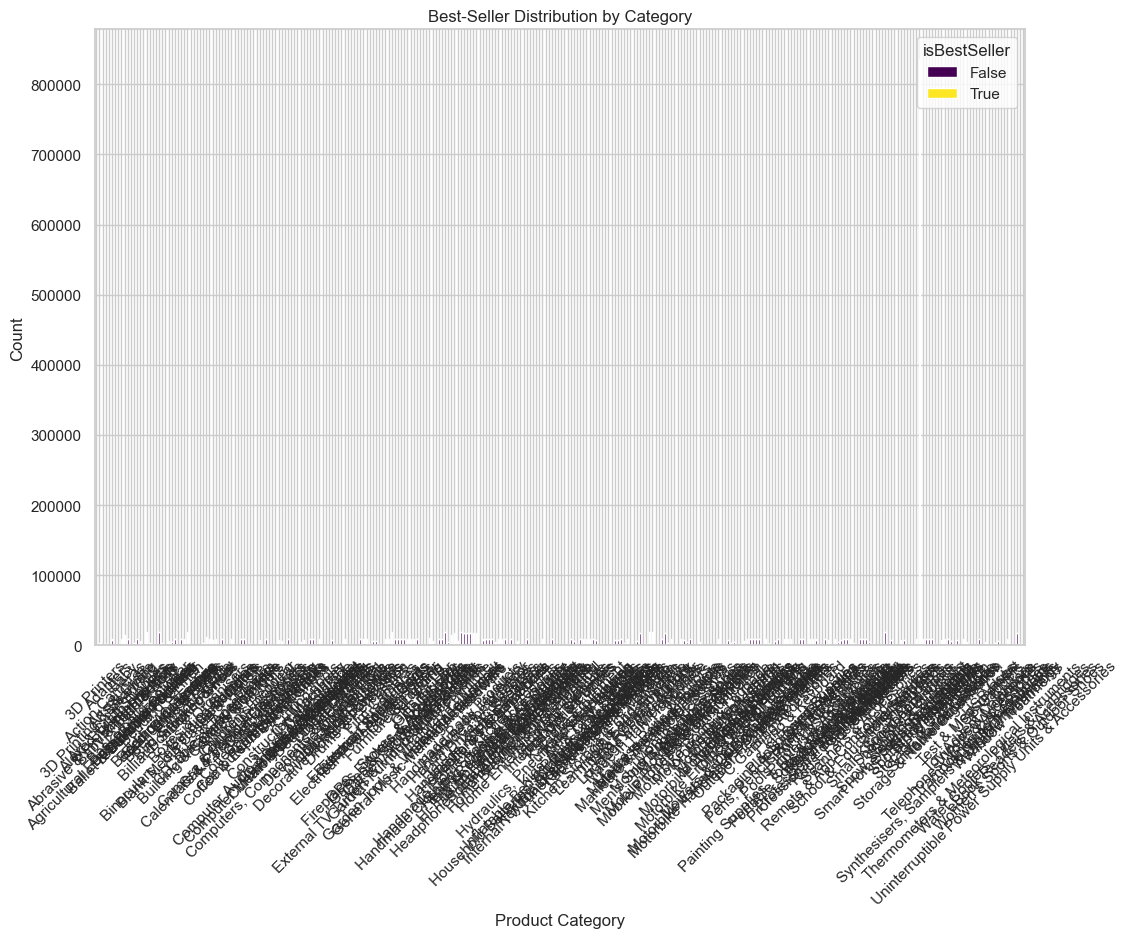

In [6]:
# Create a stacked bar chart to visualize the relationship between category and best-seller status
crosstab.plot(kind='bar', stacked=True, figsize=(12,8), colormap='viridis')
plt.title('Best-Seller Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='isBestSeller', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Calculate Q1, Q3, and IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Original dimensions:", df.shape)
print("Dimensions after removing outliers:", df_no_outliers.shape)


Original dimensions: (2443651, 9)
Dimensions after removing outliers: (2115963, 9)


/var/folders/rz/y5w2t9n931jd5fypn89ymc580000gn/T/ipykernel_1230/75752142.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=df_top20, palette="viridis")


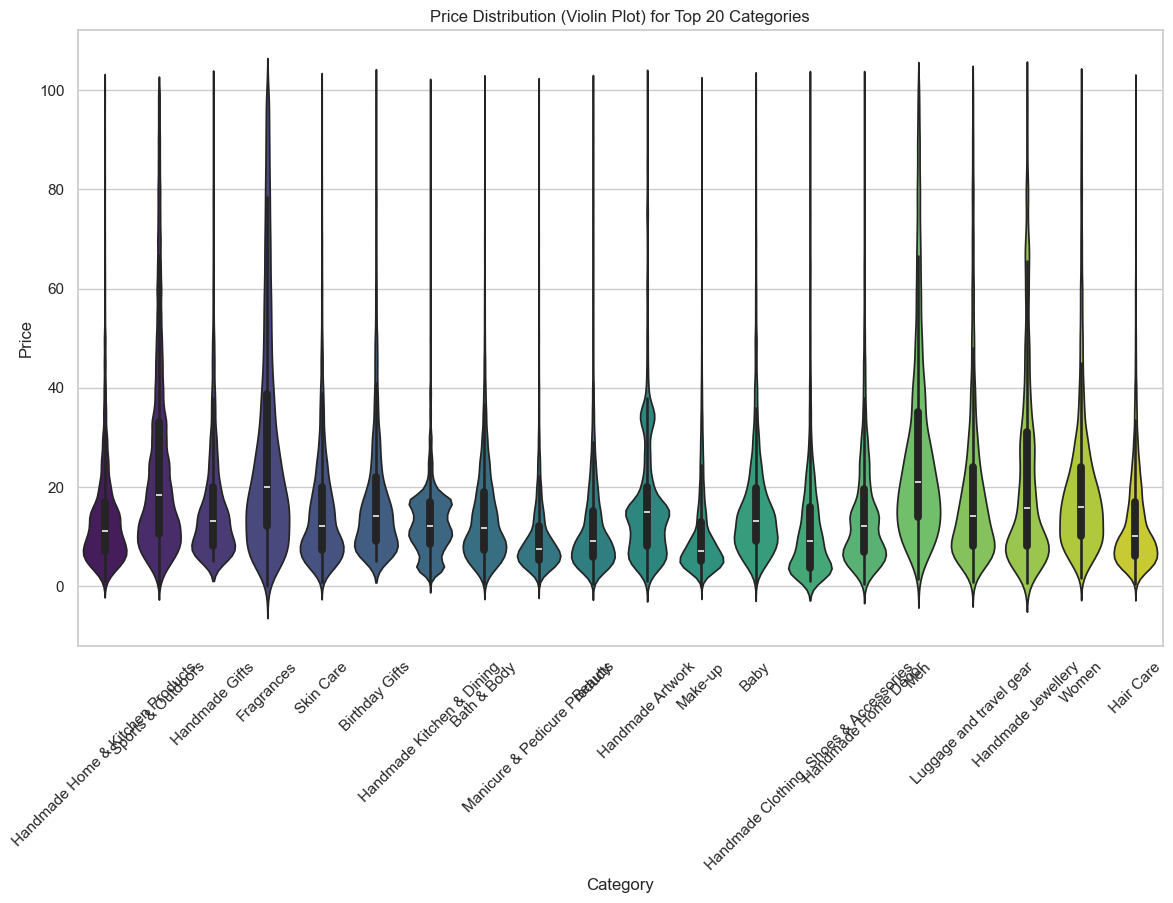

In [8]:
# Select the top 20 categories with the most listings (without outliers)
top20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]

plt.figure(figsize=(14,8))
sns.violinplot(x='category', y='price', data=df_top20, palette="viridis")
plt.title("Price Distribution (Violin Plot) for Top 20 Categories")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


In [9]:
median_price_by_cat = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
print("\nCategory with the highest median price:")
print(median_price_by_cat.head(1))



Category with the highest median price:
category
Desktop PCs    74.0
Name: price, dtype: float64


/var/folders/rz/y5w2t9n931jd5fypn89ymc580000gn/T/ipykernel_1230/1495465080.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_cat.index, y=avg_price_by_cat.values, palette="viridis")


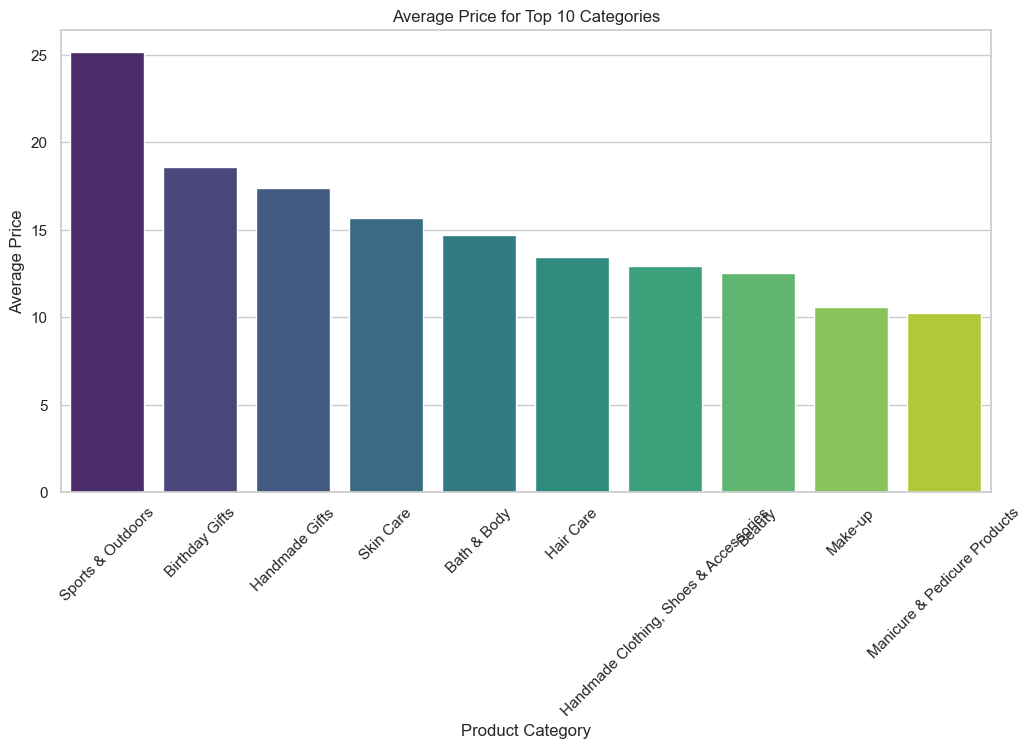

In [10]:
# Select the top 10 categories by count
top10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]

# Calculate the average price per category
avg_price_by_cat = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_cat.index, y=avg_price_by_cat.values, palette="viridis")
plt.title("Average Price for Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


In [11]:
avg_price_by_cat_all = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
print("\nCategory with the highest average price:")
print(avg_price_by_cat_all.head(1))



Category with the highest average price:
category
Motherboards    68.772432
Name: price, dtype: float64


/var/folders/rz/y5w2t9n931jd5fypn89ymc580000gn/T/ipykernel_1230/2109814605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top10_ratings, palette="viridis")


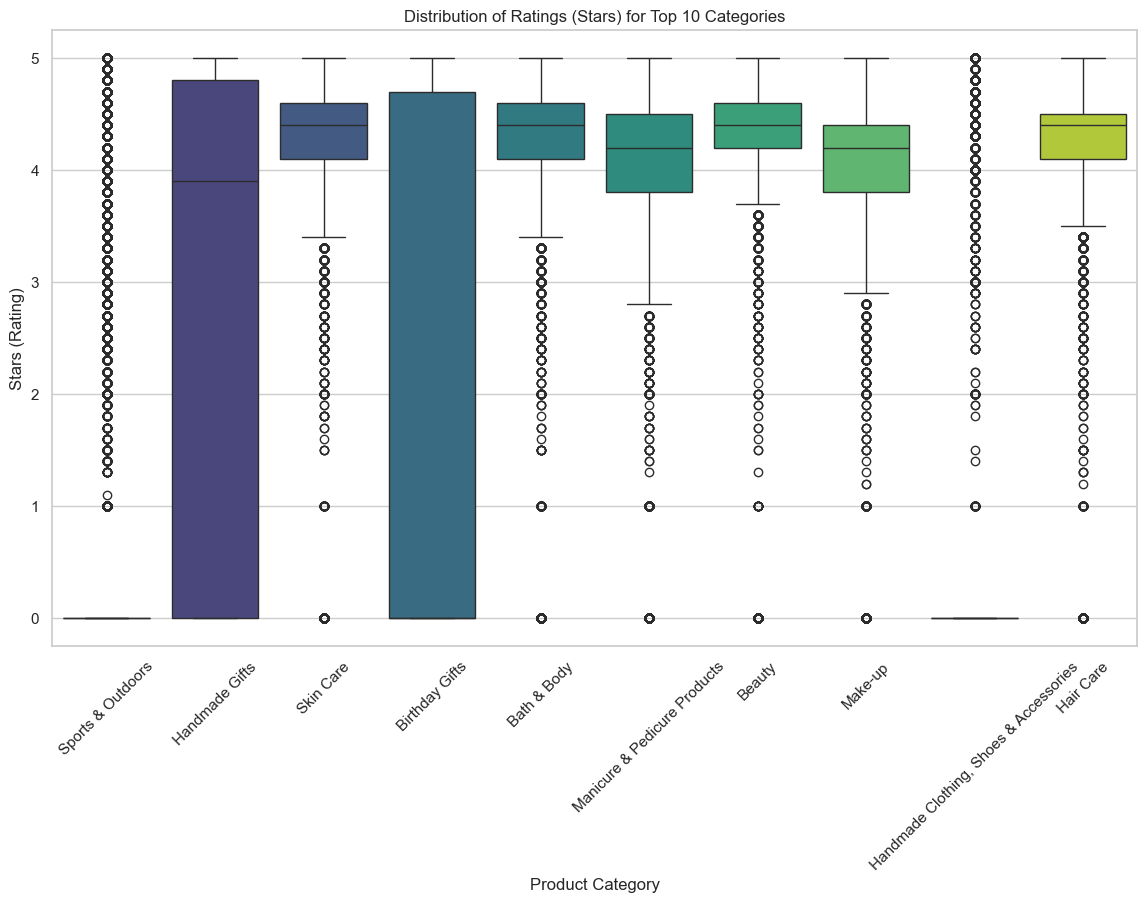

In [12]:
# Select the top 10 categories by count for ratings visualization
top10_cat_ratings = df_no_outliers['category'].value_counts().head(10).index
df_top10_ratings = df_no_outliers[df_no_outliers['category'].isin(top10_cat_ratings)]

plt.figure(figsize=(14,8))
sns.boxplot(x='category', y='stars', data=df_top10_ratings, palette="viridis")
plt.title("Distribution of Ratings (Stars) for Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Stars (Rating)")
plt.xticks(rotation=45)
plt.show()


In [13]:
median_rating_by_cat = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
print("\nCategory with the highest median rating:")
print(median_rating_by_cat.head(1))



Category with the highest median rating:
category
Computer Memory    4.7
Name: stars, dtype: float64


In [14]:
corr = df_no_outliers['price'].corr(df_no_outliers['stars'])
print("\nCorrelation coefficient between price and stars (without outliers):", corr)



Correlation coefficient between price and stars (without outliers): -0.07767299878181444


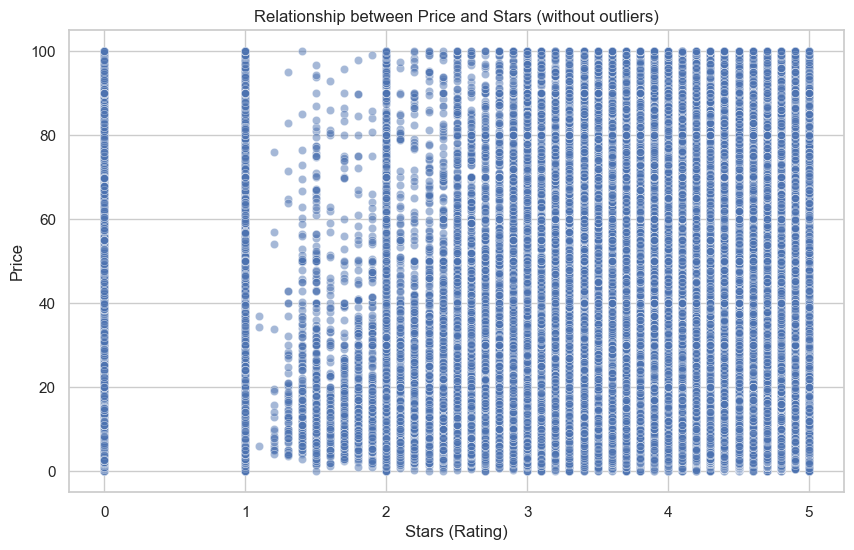

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='stars', y='price', data=df_no_outliers, alpha=0.5)
plt.title("Relationship between Price and Stars (without outliers)")
plt.xlabel("Stars (Rating)")
plt.ylabel("Price")
plt.show()


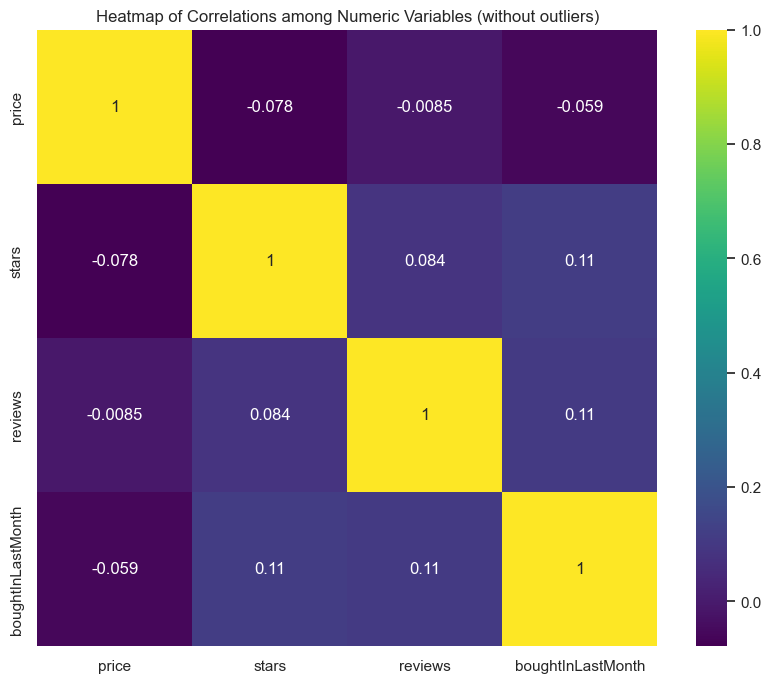

In [16]:
# Select numerical variables for the heatmap
num_vars = ['price', 'stars', 'reviews', 'boughtInLastMonth']
plt.figure(figsize=(10,8))
sns.heatmap(df_no_outliers[num_vars].corr(), annot=True, cmap="viridis")
plt.title("Heatmap of Correlations among Numeric Variables (without outliers)")
plt.show()


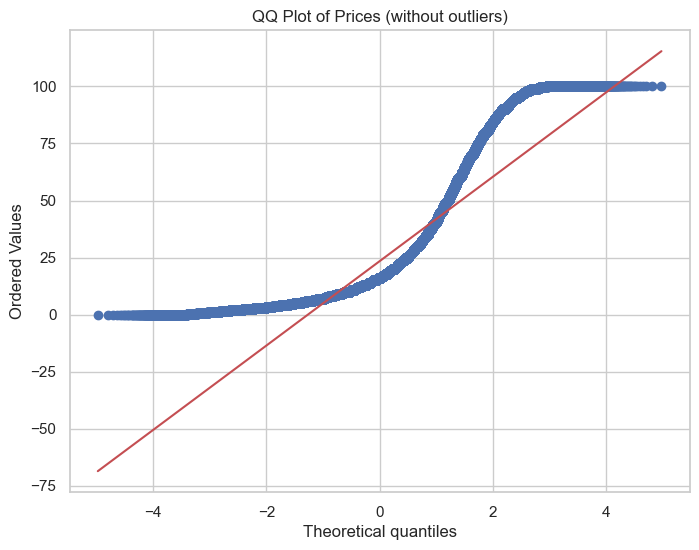

In [17]:
plt.figure(figsize=(8,6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Prices (without outliers)")
plt.show()



Correlation coefficient between price and stars (with outliers): -0.12490673262148386


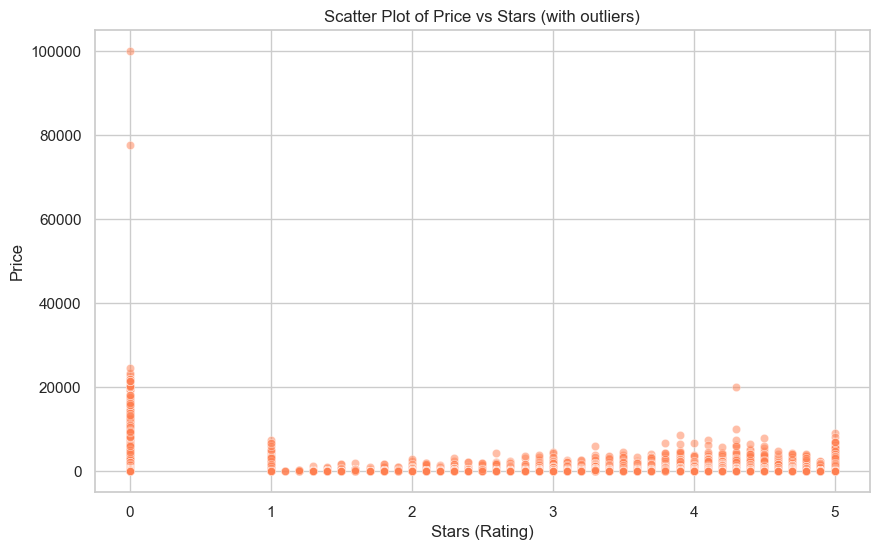

In [18]:
# Correlation with outliers
corr_all = df['price'].corr(df['stars'])
print("\nCorrelation coefficient between price and stars (with outliers):", corr_all)

plt.figure(figsize=(10,6))
sns.scatterplot(x='stars', y='price', data=df, alpha=0.5, color='coral')
plt.title("Scatter Plot of Price vs Stars (with outliers)")
plt.xlabel("Stars (Rating)")
plt.ylabel("Price")
plt.show()
